<h1><center> Machine Learning Rapport </center></h1>

<br/>
<div class='text-danger'><center> Auteur: CHEN Kuo, FENG Zidu, ZHANG Zisong</center></div>

# 1. Aim of the projet

There are different ways to model a problem depending on the type of data. In the field of machine learning or artificial intelligence, people will first consider algorithmic learning methods. In the field of machine learning, there are several main learning methods. It is a good idea to classify the algorithm according to the learning method, so that when people are modeling and selecting the algorithm, they can consider the most suitable algorithm according to the input data to get the best results.
According to different types of learning, we can divide learning into supervised learning, unsupervised learning, semi-supervised learning, and reinforcement learning.

The aim of this projet is to evaluate our ability to use Machine Learning for solving a given predictive problem of interest.

In this project, we want to make a regression model on player salary prediction, so we use supervised learning and semi-supervised learning methods. In supervised learning, we use K-Nearest Neighbor (KNN), Linear Regression, BayesianRidge, Decision Tree, and Random Forest in Bayesian algorithm to model and predict; in semi-supervised learning In this paper, we use the SVR model for regression analysis in support vector machines.

First, we obtained a dataset of FIFA 2019 players attributes (https://www.kaggle.com/karangadiya/fifa19) from the Kaggle website. Then, we perform data processing, data analysis, model building, training model and prediction score. Finally, we perform a graphical analysis of the prediction effect of the model.

# 2. Import Original Data

In [4]:
import pandas as pd

path = '/Users/ck/Downloads/[ML1] CHENKuo_1 -FENGZidu_2-ZHANGZisong_3/data.csv'
dataframe = pd.read_csv(path)
dataframe

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


By observing the imported raw data, we learn that data.csv includes tags for player attributes of the latest version of FIFA 2019, such as Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, etc.

We analyzed the data and found that the seven tags 'Age', 'Overall', 'Potential', 'Special', 'InternationalReputation', 'WeakFoot', 'SkillMoves' have the highest correlation with 'Wage'. Then we performed data processing and graph analysis.

# 3. Data Processing

In [2]:
import math
import matplotlib.pyplot as plt #  package used for plotting

df = dataframe.loc[:, ['Age', 'Overall', 'Potential', 'Special', 'InternationalReputation', 'WeakFoot', 'SkillMoves', 'Wage']]
df.dropna(inplace = True)  # delete empty rows
for i in range(len(df.index)):
    df.iat[i, 7] = df.iat[i, 7].replace('€', '')
    df.iat[i, 7] = df.iat[i, 7].replace('K', '000')
df['Wage'] = df['Wage'].astype('int64')
df = df[(df.Wage != 0)]
df.iloc[:, 7] = df.iloc[:, 7].apply(lambda x: math.log(1 + x))
print('Here is the data after removing the "€" and "K"：')
df

Here is the data after removing the "€" and "K"：


,Age,Overall,Potential,Special,InternationalReputation,WeakFoot,SkillMoves,Wage
0,31,94,94,2202,5.0,4.0,4.0,13.244583
1,33,94,94,2228,5.0,4.0,5.0,12.911645
2,26,92,93,2143,5.0,5.0,5.0,12.577640
3,27,91,93,1471,4.0,3.0,1.0,12.468441
4,27,91,92,2281,4.0,5.0,4.0,12.779876
...,...,...,...,...,...,...,...,...
18202,19,47,65,1307,1.0,2.0,2.0,6.908755
18203,19,47,63,1098,1.0,2.0,2.0,6.908755
18204,16,47,67,1189,1.0,3.0,2.0,6.908755
18205,17,47,66,1228,1.0,3.0,2.0,6.908755


# 4. Data Analysis

(17918, 8)
                Age       Overall     Potential       Special  \
count  17918.000000  17918.000000  17918.000000  17918.000000   
mean      25.105257     66.236801     71.329334   1598.111731   
std        4.675372      6.929243      6.144098    272.983157   
min       16.000000     46.000000     48.000000    731.000000   
25%       21.000000     62.000000     67.000000   1457.000000   
50%       25.000000     66.000000     71.000000   1636.000000   
75%       28.000000     71.000000     75.000000   1787.000000   
max       45.000000     94.000000     95.000000   2346.000000   

       InternationalReputation      WeakFoot    SkillMoves          Wage  
count             17918.000000  17918.000000  17918.000000  17918.000000  
mean                  1.113908      2.947260      2.362875      8.278623  
std                   0.395495      0.660106      0.756309      1.231262  
min                   1.000000      1.000000      1.000000      6.908755  
25%                   1.0000

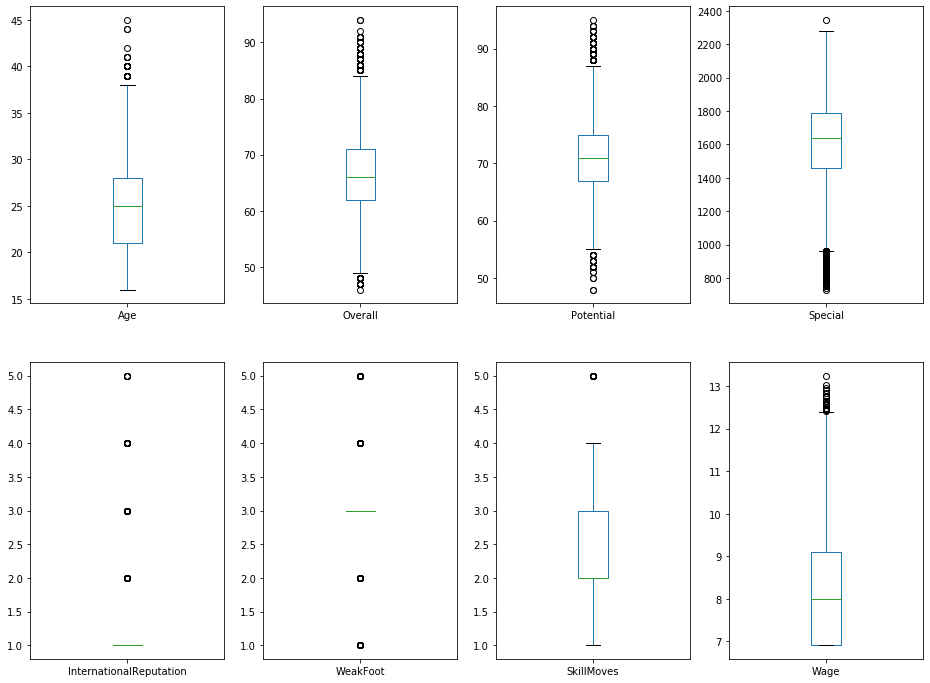

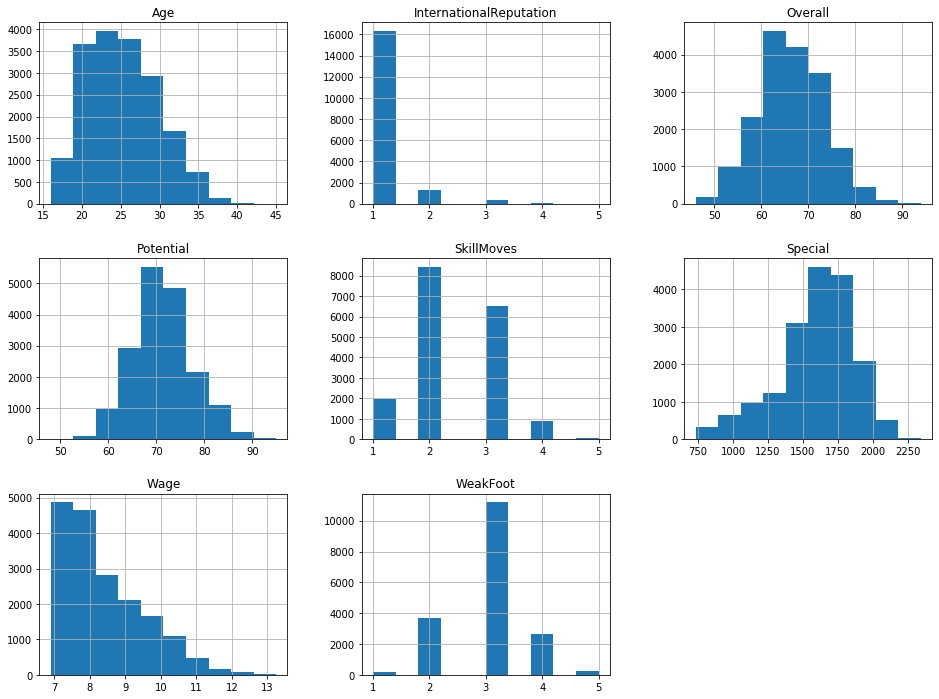

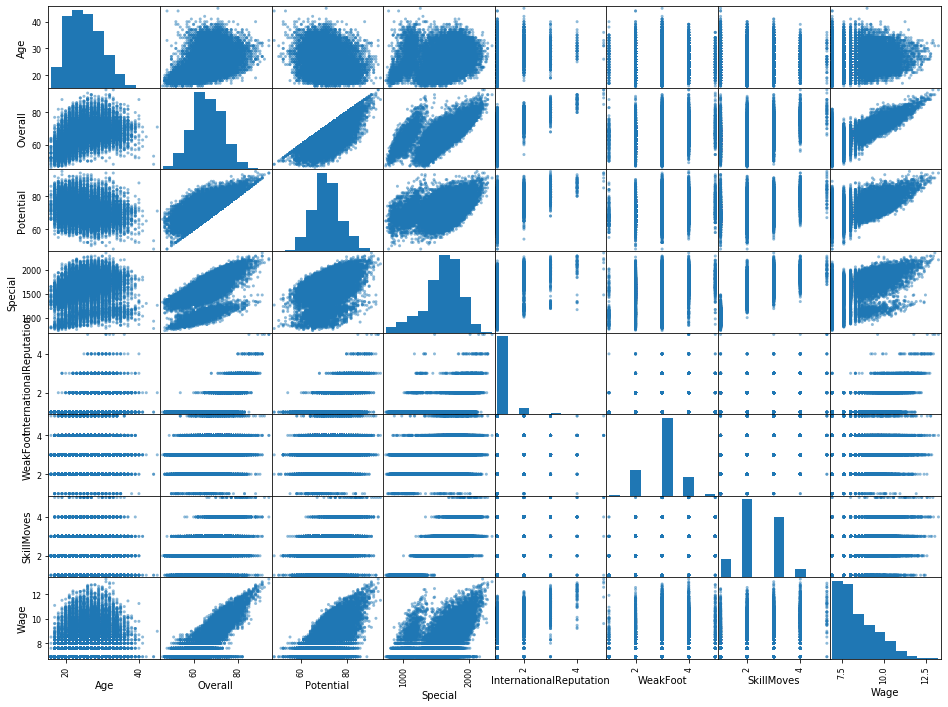

In [3]:
print(df.shape) # data size
print(df.describe()) # mean, standard deviation, etc. of the dataset
df.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(16, 12))
plt.show() # create a boxplot of each input variable
df.hist(figsize=(16, 12))
plt.show() # histogram

pd.plotting.scatter_matrix(df, figsize=(16, 12))
plt.show() # scatter matrix

As can be seen from the above figure, the data after data processing contains 17,918 rows and 8 columns: 7 of which are labels. By using the describe () function, we can see a summary of each attribute, including the number of data, the mean, the standard deviation, the maximum and minimum values, and so on.
1. Boxplot: Considering that the input variables are numeric, we can create a boxplot of each input variable, which allows us to understand the distribution of input attributes more clearly.
2. Histogram: By drawing a histogram of each label, we can intuitively see the distribution of the data, and some of the input variables may fit the Gaussian distribution.
3. Scatter plot: By looking at the scatter plot of all attribute pairs, it helps to discover the structured relationship between the input variables and observe these groups close to the diagonal, which is a manifestation of high correlation and predictable relationships .

# 5. Evaluation Algorithm

## 5.1 Create Validation Dataset

In [4]:
from sklearn import model_selection

# Split-out validation data set
array = df.values
X = array[:, 0:7]
Y = array[:, 7]
validation_size = 0.3 # Set the proportion of test in the train / test pair
seed = 20
x_train, x_test, y_train, y_true = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

## 5.2 Training and Evaluation

In [5]:
# Machine Algorithm Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Cutting training data and sample data
from sklearn.model_selection import train_test_split

# For model scoring
from sklearn.metrics import r2_score

# Create a learning model
knn = KNeighborsRegressor()
linear = LinearRegression()
reg = BayesianRidge()
decision = DecisionTreeRegressor()
svr = SVR()
forest = RandomForestRegressor()

# Training model
knn.fit(x_train, y_train)
linear.fit(x_train, y_train)
reg.fit(x_train, y_train)
decision.fit(x_train, y_train)
svr.fit(x_train, y_train)
forest.fit(x_train, y_train)

# Predict data
y_pre_knn = knn.predict(x_test)
y_pre_linear = linear.predict(x_test)
y_pre_reg = reg.predict(x_test)
y_pre_decision = decision.predict(x_test)
y_pre_svr = svr.predict(x_test)
y_pre_forest = forest.predict(x_test)

# Score
knn_score = r2_score(y_true, y_pre_knn)
linear_score = r2_score(y_true, y_pre_linear)
reg_score = r2_score(y_true, y_pre_reg)
decision_score = r2_score(y_true, y_pre_decision)
svr_score = r2_score(y_true, y_pre_svr)
forest_score = r2_score(y_true, y_pre_forest)

print('The score of model K-Neighbors Regressor is   : ', knn_score)
print('The score of model Linear Regression is       : ', linear_score)
print('The score of model Bayesian Ridge is          : ', reg_score)
print('The score of model Decision Tree Regressor is : ', decision_score)
print('The score of model Support Vector Machines is : ', svr_score)
print('The score of model Random Forest Regressor is : ', forest_score)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The score of model K-Neighbors Regressor is   :  0.6407494923406265
The score of model Linear Regression is       :  0.6766978350288977
The score of model Bayesian Ridge is          :  0.6767322492273773
The score of model Decision Tree Regressor is :  0.40435270063119
The score of model Support Vector Machines is :  0.37488462701988534
The score of model Random Forest Regressor is :  0.6506977489388649


In terms of model evaluation, we use the r2_score method. The r2_score package we call gives the model score based on the following formula:
$$R^2(y, \hat y) = \frac{\sum^{n_{samples} - 1}_{i = 0}(y_i - \hat y_i)^2}{\sum^{n_{samples} - 1}_{i = 0}(y_i - \bar y_i)^2} $$
The closer the model score is to 1, the better the model fits the data, and the better the model is.

We have briefly summarized the advantages and disadvantages of these 6 models:

| Model | Advantages | Disadvantages |
| :----: |:----: | :----: |
K-Neighbors Regressor | Can be used for both numerical and discrete data<br>Training time complexity is O (n)<br>No data input assumptions | High computational complexity<br>When the value is large, the calculation is too large |
Linear Regression | Modeling is fast, no complicated calculations are needed, and it still runs fast with large amounts of data | Cannot fit nonlinear data well |
Bayesian Ridge | Adaptive to data<br>Can introduce regular terms in the estimation process | Calculation time too long |
Decision Tree Regressor | Easy to interpret, non-parametric | Tends to overfit, may be trapped in local minimums |
Support Vector Machines | Suitable for small sample data, can solve high-dimensional problems<br>Excellent performance on non-linear separable problems | Contrast sample data with large data, computer memory and other resources are difficult to support |
Random Forest Regressor | Able to process data of very high dimensions (many features)<br>For unbalanced data sets, it can balance errors | Overfitting on noisy regression problems |

From the scores of the above models, it can be seen that Linear Regression and Bayesian Ridge have the best results, both reaching 67.7% accuracy; K-Neighbors Regressor and Random Forest Regressor are next, and they have 64% and 65.3% accuracy Rate; and Decision Tree Regressor and Support Vector Machines are less effective. Among them, Support Vector Machines is a semi-supervised learning method, so it has only a 37.4% fit.

# 6. Image Analysis of Evaluation Results

## 6.1 Histogram

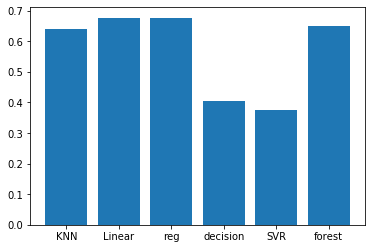

In [6]:
results = [knn_score, linear_score, reg_score, decision_score, svr_score, forest_score]
names = ["KNN", "Linear", "reg", "decision", "SVR", "forest"]
plt.bar(range(1, 7), results)
plt.xticks(range(1, 7), names)
plt.show()

Through the histogram, we can more intuitively see the comparison of the evaluation results of the six models.

## 6.2 Fitting Images for Training Model and Testing Model

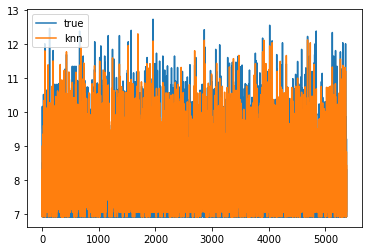

In [7]:
# KNN
plt.plot(y_true, label='true')
plt.plot(y_pre_knn, label='knn')
plt.legend()

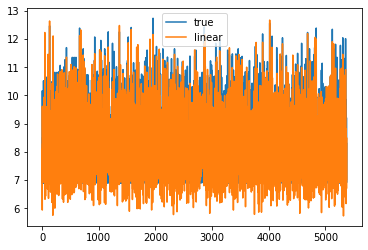

In [8]:
# linear
plt.plot(y_true, label='true')
plt.plot(y_pre_linear, label='linear')
plt.legend()

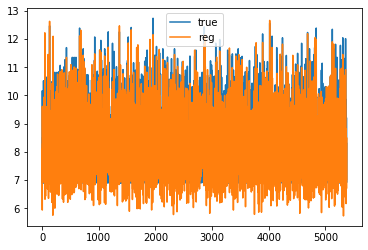

In [9]:
# reg
plt.plot(y_true, label='true')
plt.plot(y_pre_reg, label='reg')
plt.legend()

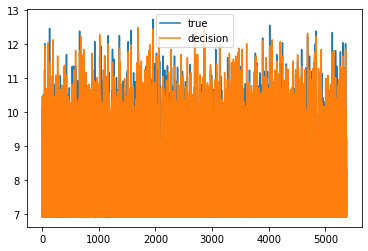

In [10]:
# decision
plt.plot(y_true, label='true')
plt.plot(y_pre_decision, label='decision')
plt.legend()

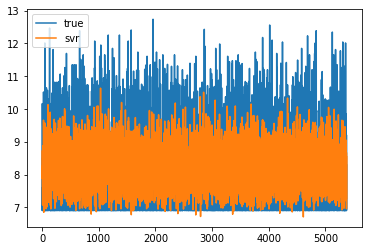

In [11]:
# SVR
plt.plot(y_true, label='true')
plt.plot(y_pre_svr, label='svr')
plt.legend()

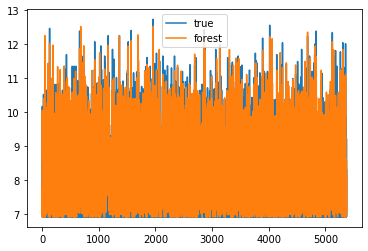

In [12]:
# forest
plt.plot(y_true, label='true')
plt.plot(y_pre_forest, label='forest')
plt.legend()

From the image "Fitting images for training and testing models"(X axis: the number of test datas; Y axis: logarithmic "Wage" value), we can clearly observe that: for the SVR test set images, it is significantly smaller than the real value, and it can be seen that the model is underfitting during training; while for the prediction image of the decision tree, the fitting degree looks very high, and the actual result The shortcomings are not satisfactory. We speculate that the test results covered the real results and affected the observation results. It was inferred that the model was overfitting during training.